In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2024-10-13 00:06:04.431125: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-13 00:06:05.005158: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
IMAGE_SHAPE = (128, 128)


classifier = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2",input_shape=IMAGE_SHAPE+(3,))])



2024-10-13 00:06:05.902265: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-13 00:06:05.933268: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-13 00:06:05.933483: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

gold_fish = np.array(gold_fish)/255.0
gold_fish.shape


gold_fish[np.newaxis,...].shape

(1, 128, 128, 3)

In [4]:
result=classifier.predict(gold_fish[np.newaxis,...])
result.shape

2024-10-13 00:06:07.660875: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600


1/1 [==============================] - 1s 1s/step


(1, 1001)

In [6]:
predicted_label_index = np.argmax(result)

image_labels = []
with open("imageNet.txt", "r") as f:
    image_labels = f.read().splitlines()

image_labels[predicted_label_index]

'goldfish'

In [8]:
print("TensorFlow version:", tf.__version__)
print("Is TensorFlow built with GPU support?", tf.test.is_built_with_cuda())


gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs detected:")
    for gpu in gpus:
        print(f"  - {gpu}")
else:
    print("No GPUs detected.")

TensorFlow version: 2.13.1
Is TensorFlow built with GPU support? True
GPUs detected:
  - PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [9]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 19s 0us/step


In [11]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [12]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/6053143173_991c011b23.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466393_6556afeb2f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3450344423_63ba3190e3.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466143_5823e48b63.jpg'),
 PosixPath('datasets/flower_photos/roses/7525783408_0999483bf4_m.jpg')]

In [13]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [14]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/6053143173_991c011b23.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466393_6556afeb2f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3450344423_63ba3190e3.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466143_5823e48b63.jpg'),
 PosixPath('datasets/flower_photos/roses/7525783408_0999483bf4_m.jpg')]

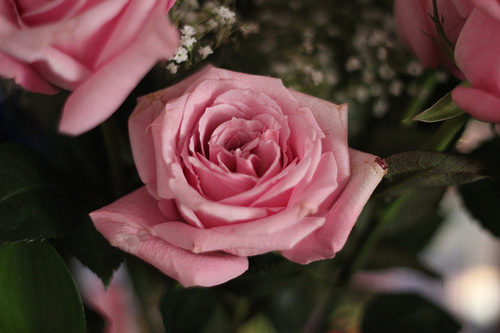

In [18]:
Image.open(str(roses[0]))

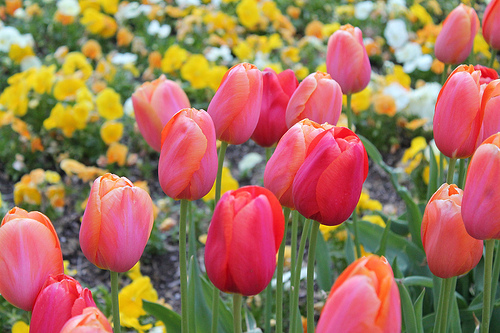

In [19]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

In [20]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [21]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/6053143173_991c011b23.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466393_6556afeb2f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3450344423_63ba3190e3.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466143_5823e48b63.jpg'),
 PosixPath('datasets/flower_photos/roses/7525783408_0999483bf4_m.jpg')]

In [22]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/6053143173_991c011b23.jpg'

In [23]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [24]:
img.shape

(333, 500, 3)

In [25]:
cv2.resize(img,(128,128)).shape

(128, 128, 3)

In [26]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(128,128))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])


In [29]:
X = np.array(X)
y = np.array(y)

<h3>Train and Test Split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [32]:
X[0].shape

(128, 128, 3)

<h3>testing on pretrained model


In [33]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

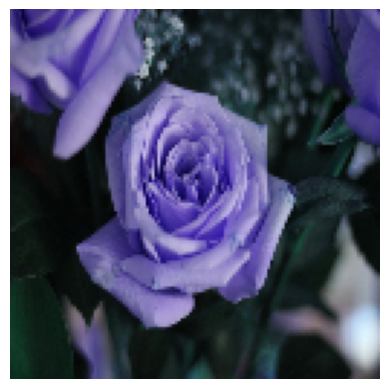

In [38]:
plt.axis('off')
plt.imshow(X[0])


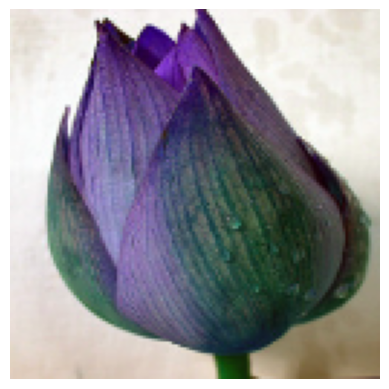

In [39]:
plt.axis('off')
plt.imshow(X[1])


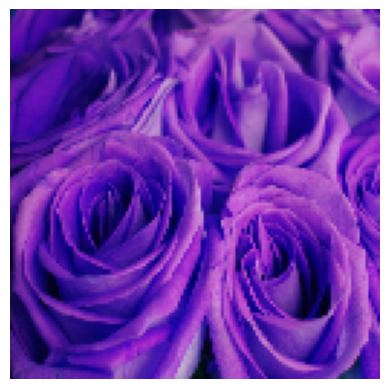

In [40]:
plt.axis('off')
plt.imshow(X[2])

In [41]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 0s 13ms/step


array([689, 905, 905])

In [43]:
image_labels[905]

'window screen'

<h2>Performing Transfer Learning

In [44]:
pretrained_model_without_top_layer=hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2",
               trainable=False,input_shape=(128, 128, 3))


In [45]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              1692489   
                                                                 
 dense (Dense)               (None, 5)                 5010      
                                                                 
Total params: 1697499 (6.48 MB)
Trainable params: 5010 (19.57 KB)
Non-trainable params: 1692489 (6.46 MB)
_________________________________________________________________


In [46]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

2024-10-13 00:19:48.452542: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 541065216 exceeds 10% of free system memory.
2024-10-13 00:19:49.045893: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 541065216 exceeds 10% of free system memory.


Epoch 1/5


2024-10-13 00:19:51.847140: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7873804f2ff0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-13 00:19:51.847175: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-10-13 00:19:51.866379: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-13 00:19:52.044326: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


86/86 [==============================] - 4s 11ms/step - loss: 1.0863 - acc: 0.6363
Epoch 2/5
86/86 [==============================] - 1s 12ms/step - loss: 0.6332 - acc: 0.7747
Epoch 3/5
86/86 [==============================] - 1s 12ms/step - loss: 0.5283 - acc: 0.8180
Epoch 4/5
86/86 [==============================] - 1s 13ms/step - loss: 0.4607 - acc: 0.8358
Epoch 5/5
86/86 [==============================] - 1s 12ms/step - loss: 0.4289 - acc: 0.8470


In [47]:
model.evaluate(X_test_scaled,y_test)

2024-10-13 00:19:59.213863: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 180486144 exceeds 10% of free system memory.
2024-10-13 00:19:59.409969: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 180486144 exceeds 10% of free system memory.


29/29 [==============================] - 1s 35ms/step - loss: 0.5981 - acc: 0.8039


[0.5980594158172607, 0.8039215803146362]